In [ ]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


In [ ]:
path = '/content/drive/MyDrive/Python Programming/ML/breast cancer.csv'

**Reading the Dataset**

In [ ]:
df_breast = pd.read_csv(path)

In [ ]:
df_breast.shape

(569, 33)

**Printing Head**

In [ ]:
df_breast.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**id:** A unique identifier for each patient

**diagnosis:** Malignant (M) or benign (B)

**radius_mean:** Mean of distances from center to points on the perimeter

**texture_mean:** Standard deviation of gray-scale values

**perimeter_mean:** Perimeter of the tumor

**area_mean:** Area of the tumor

**smoothness_mean:** Local variation in radius lengths

**compactness_mean:** Perimeter^2 / area - 1.0

**concavity_mean:** Severity of concave portions of the contour

**symmetry_mean:** Symmetry of tumor

**fractal_dimension_mean:** "Coastline approximation" - 1

**Unnamed: 32:** An empty column that can be dropped from the dataset.

**Data Preprocessing**

In [ ]:
df_breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# checking missing values
df_breast.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df_breast.duplicated().sum()

0

In [ ]:
# drop column
df_breast.drop('Unnamed: 32', axis=1, inplace=True)

In [ ]:
df_breast.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Dignosis Check**

In [ ]:
df_breast['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


**Encoding the Target Variable**

In [ ]:
# label encoding on dignosis column
label_encoder = LabelEncoder()
df_breast['diagnosis'] = label_encoder.fit_transform(df_breast['diagnosis'])

In [ ]:
# after encoding

df_breast['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


**Exploratory Data Analysis (EDA)**

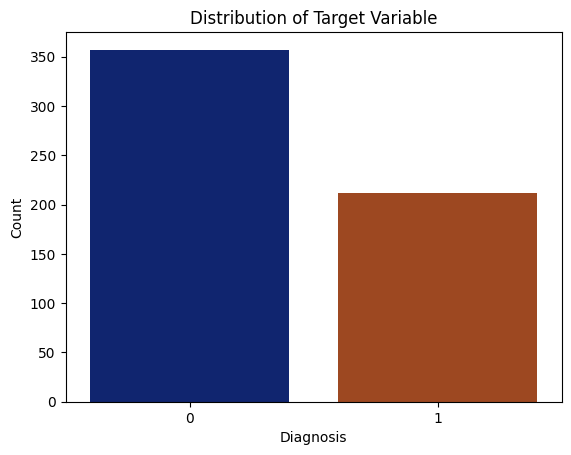

In [ ]:
# Visualize the distribution of the target variable
sns.countplot(x='diagnosis', data=df_breast, palette='dark')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

In [ ]:
# correlation matrix
df_breast.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


**Splitting Data into Training and Testing Sets**

In [ ]:
X = df_breast.drop('diagnosis', axis=1)
y = df_breast['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(455, 31)

In [ ]:
X_train

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,859471,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,873593,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,859196,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,88466802,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,858970,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,859711,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,863031,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,8910721,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,908489,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [ ]:
X_test.shape

(114, 31)

In [ ]:
X_test

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,87930,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,859575,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,8670,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,907915,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,921385,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,913102,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596
75,8610404,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387
249,884689,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
238,883270,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,...,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796


**SMOTE to balance the dataset**

In [ ]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
# Check class distribution after balancing
print("Class distribution after SMOTE:")
print(y_train_balanced.value_counts())

Class distribution after SMOTE:
diagnosis
0    286
1    286
Name: count, dtype: int64


**Feature Scaling**

In [ ]:
# scale the feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.23712699, -1.44075296, -0.43531947, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [-0.23702031,  1.97409619,  1.73302577, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-0.23712907, -1.39998202, -1.24962228, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [-0.17630431,  0.04880192, -0.55500086, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.23675669, -0.03896885,  0.10207345, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.2371006 , -0.54860557,  0.31327591, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [ ]:
X_test

array([[-0.24295555, -0.46649743, -0.13728933, ..., -0.19435087,
         0.17275669,  0.20372995],
       [-0.23712621,  1.36536344,  0.49866473, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [-0.24355432,  0.38006578,  0.06921974, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.23693649, -0.73547237, -0.99852603, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [-0.23694721,  0.02898271,  2.0334026 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 0.42868759,  1.87216885,  2.80077153, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

**Training Model**

In [ ]:
# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Evaluate the performance on the testing set
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy:', accuracy_lr)

Accuracy: 0.9736842105263158


In [ ]:
df_breast.sample()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
494,914102,0,13.16,20.54,84.06,538.7,0.07335,0.05275,0.018,0.01256,...,14.5,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429


**Prediction System**

In [ ]:
input_text = (-0.23717126, -0.64487029, -0.11382239, -0.57427777, -0.60294971,
         1.0897546 ,  0.91543814,  0.41448279,  0.09311633,  1.78465117,
         2.11520208,  0.28454765, -0.31910982,  0.2980991 ,  0.01968238,
        -0.47096352,  0.45757106,  0.28733283, -0.23125455,  0.26417944,
         0.66325388,  0.12170193,  0.42656325,  0.36885508,  0.02065602,
         1.39513782,  2.0973271 ,  2.01276347,  0.61938913,  2.9421769 ,
         3.15970842)
np_df = np.asarray(input_text)
pred = lr.predict(np_df.reshape(1,-1))
if pred == 1:
    print("Cancerous")
else:
    print("Not Cancerous")

Cancerous


In [ ]:
# -0.23717126, -0.64487029, -0.11382239, -0.57427777, -0.60294971,
#         1.0897546 ,  0.91543814,  0.41448279,  0.09311633,  1.78465117,
#         2.11520208,  0.28454765, -0.31910982,  0.2980991 ,  0.01968238,
#        -0.47096352,  0.45757106,  0.28733283, -0.23125455,  0.26417944,
#         0.66325388,  0.12170193,  0.42656325,  0.36885508,  0.02065602,
#         1.39513782,  2.0973271 ,  2.01276347,  0.61938913,  2.9421769 ,
#         3.15970842


#   -0.23711093, -0.4976419 ,  0.61365274, -0.49813131, -0.53102815,
#        -0.57694824, -0.17494424, -0.36215622, -0.284859  ,  0.43345165,
#         0.17818232, -0.36844966,  0.55310406, -0.31671104, -0.40524636,
#         0.04025752, -0.03795529, -0.18043065,  0.16478901, -0.12170969,
#         0.23079329, -0.50044002,  0.81940367, -0.46922838, -0.53308833,
#        -0.04910117, -0.04160193, -0.14913653,  0.09681787,  0.10617647,
#         0.49035329